<a href="https://colab.research.google.com/github/KittanateNew/Rapidminer-Python-project-company-bankruptcies-/blob/main/bankrupts(final).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocess

Import Dataset

In [ ]:
import pandas as pd
import sklearn

dataset = pd.read_csv('/content/kaggle_data/data.csv')
dataset.columns = dataset.columns.str.strip()
dataset.head()

In [ ]:
dataset = dataset.drop(columns = ['Net Income Flag'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

Calculate correlation_matrix

In [ ]:
correlation_matrix = dataset.corr()
print(correlation_matrix['Net Value Growth Rate'])

Bankrupt?                                                  0.065329
ROA(C) before interest and depreciation before interest   -0.021930
ROA(A) before interest and % after tax                    -0.063970
ROA(B) before interest and depreciation after tax         -0.026127
Operating Gross Margin                                    -0.017448
                                                             ...   
Net Income to Stockholder's Equity                         0.068054
Liability to Equity                                       -0.068649
Degree of Financial Leverage (DFL)                        -0.000697
Interest Coverage Ratio (Interest expense to EBIT)        -0.000446
Equity to Liability                                       -0.010685
Name: Net Value Growth Rate, Length: 95, dtype: float64


หา attribute ที่ค่า correlation มากกว่า 0.7
แล้วเก็บไว้่เพิ่มนำไปลบต่อ

In [ ]:
correlation_threshold = 0.7
correlated_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= correlation_threshold:
            colname = correlation_matrix.columns[i]
            correlated_columns.add(colname)

print(correlated_columns)

{'ROA(A) before interest and % after tax', 'Regular Net Profit Growth Rate', 'Operating Funds to Liability', 'After-tax net Interest Rate', 'Operating profit/Paid-in capital', 'Current Assets/Total Assets', 'Liability to Equity', 'Realized Sales Gross Margin', 'Net Value Per Share (C)', 'Net worth/Assets', 'Cash Flow to Sales', 'Persistent EPS in the Last Four Seasons', 'ROA(B) before interest and depreciation after tax', 'Retained Earnings to Total Assets', 'Operating Profit Per Share (Yuan ¥)', 'Pre-tax net Interest Rate', "Net Income to Stockholder's Equity", 'Inventory and accounts receivable/Net value', 'Current Liability to Liability', 'CFO to Assets', 'Equity to Long-term Liability', 'Continuous interest rate (after tax)', 'Net profit before tax/Paid-in capital', 'Cash Flow to Liability', 'Working capitcal Turnover Rate', 'Current Liability to Assets', 'Current Liabilities/Equity', 'Current Liability to Equity', 'Gross Profit to Sales', 'Net Income to Total Assets', 'Net Worth T

ลบ attribute ที่เกี่ยวข้องกันออก

In [ ]:
dataset = dataset.drop(columns=correlated_columns)


In [ ]:
dataset.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Cash Flow Per Share,Revenue Per Share (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Long-term Liability to Current Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Cash Flow to Total Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.601457,0.998969,0.302646,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.311664,0.017560,0.022102,0.848195,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.005024,0.390284,0.006479,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.034164,0.392913,0.037135,0.672775,0.166673,0.004094,0.001997,1.473360e-04,0.276920,0.001036,0.676269,0.025592,0.002022,0.064856,7.010000e+08,6.550000e+09,4.580000e+08,0.424206,0.637555,0.312905,0.118250,0,0.009219,0.622879,0.026601,0.564050,0.016469
1,1,0.464291,0.610235,0.998946,0.303556,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.318137,0.021144,0.022080,0.848088,0.689693,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.005059,0.376760,0.005835,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.006889,0.391590,0.012335,0.751111,0.127236,0.014948,0.004136,1.383910e-03,0.289642,0.005210,0.308589,0.023947,0.002226,0.025516,1.065198e-04,7.700000e+09,2.490000e+09,0.468828,0.641100,0.314163,0.047775,0,0.008323,0.623652,0.264577,0.570175,0.020794
2,1,0.426071,0.601450,0.998857,0.302035,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.307102,0.005944,0.022760,0.848094,0.689463,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.005100,0.379093,0.006562,0.014993,0.001495,0.004227,6.500000e+07,2.650000e+09,0.028997,0.381968,0.141016,0.829502,0.340201,0.000991,0.006302,5.340000e+09,0.277456,0.013879,0.446027,0.003715,0.002060,0.021387,1.791094e-03,1.022676e-03,7.610000e+08,0.276179,0.642765,0.314515,0.025346,0,0.040003,0.623841,0.026555,0.563706,0.016474
3,1,0.399844,0.583541,0.998700,0.303350,1.078888e-04,0.0,0.465705,0.000449,0.0,0.154187,0.321674,0.014368,0.022046,0.848005,0.689110,0.217568,4.880000e+09,0.000382,0.263371,0.384077,0.004194,0.002896,0.630228,0.009572,0.151465,0.005047,0.379743,0.005366,0.089955,0.001966,0.003215,7.130000e+09,9.150000e+09,0.015463,0.378497,0.021320,0.725754,0.161575,0.018851,0.002961,1.010646e-03,0.276580,0.003540,0.615848,0.022165,0.001831,0.024161,8.140000e+09,6.050000e+09,2.030000e+09,0.559144,0.579039,0.302382,0.067250,0,0.003252,0.622929,0.026697,0.564663,0.023982
4,1,0.465022,0.598783,0.998973,0.303475,7.890000e+09,0.0,0.462746,0.000686,0.0,0.167502,0.319162,0.029690,0.022096,0.848258

In [ ]:
from sklearn.model_selection import train_test_split

labels = dataset['Bankrupt?']

trainDataset, testDataset = train_test_split(dataset, test_size=0.3, stratify=labels, random_state=69)

# Over sampling

In [ ]:
y = trainDataset['Bankrupt?']
x = trainDataset.drop(columns = ['Bankrupt?'], axis = 1)
y.value_counts()

0    4619
1     154
Name: Bankrupt?, dtype: int64

In [ ]:
print(dataset.isna())

      Bankrupt?  ROA(C) before interest and depreciation before interest  \
0         False                                              False         
1         False                                              False         
2         False                                              False         
3         False                                              False         
4         False                                              False         
...         ...                                                ...         
6814      False                                              False         
6815      False                                              False         
6816      False                                              False         
6817      False                                              False         
6818      False                                              False         

      Operating Gross Margin  Operating Profit Rate  \
0                      False    

<Axes: ylabel='Bankrupt?'>

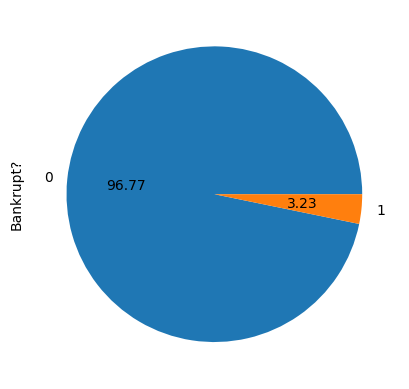

In [ ]:
y.value_counts().plot.pie(autopct='%.2f')

lable shape : 9238
x shape : 9238


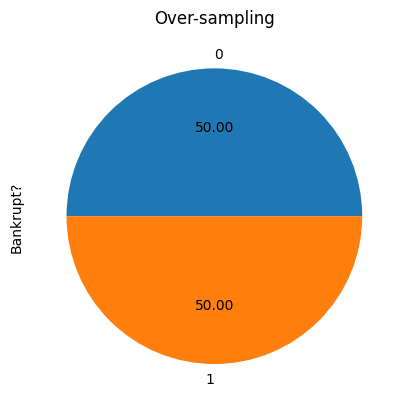

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=1)
x_res, y_res = ros.fit_resample(x, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")
print(f"lable shape : {y_res.shape[0]}")
print(f"x shape : {x_res.shape[0]}")

In [ ]:
oversampling_train = x_res.join(y_res)
oversampling_train.head()
print(oversampling_train.shape[0])
print(oversampling_train.isna().sum())

9238
ROA(C) before interest and depreciation before interest    0
Operating Gross Margin                                     0
Operating Profit Rate                                      0
Non-industry income and expenditure/revenue                0
Operating Expense Rate                                     0
                                                          ..
No-credit Interval                                         0
Degree of Financial Leverage (DFL)                         0
Interest Coverage Ratio (Interest expense to EBIT)         0
Equity to Liability                                        0
Bankrupt?                                                  0
Length: 61, dtype: int64


In [ ]:
from google.colab import files

oversampling_train.to_csv('bankrupt_train.csv', encoding = 'utf-8-sig', index=False)
testDataset.to_csv('bankrupt_scoring.csv', encoding = 'utf-8-sig',index=False)

In [ ]:
!ls

bankrupt_scoring.csv  bankrupt_train.csv  kaggle_data  logs.log  sample_data


In [ ]:
# files.download('bankrupt_scoring.csv')
# files.download('bankrupt_train.csv')

# Use PyCaret to find best Classification model

In [ ]:
!pip install pycaret

In [ ]:
from pycaret.classification import *
test_data = setup(data = oversampling_train, target = 'Bankrupt?', session_id=69)

,Description,Value
0,Session id,69
1,Target,Bankrupt?
2,Target type,Binary
3,Original data shape,"(9238, 61)"
4,Transformed data shape,"(9238, 61)"
5,Transformed train set shape,"(6466, 61)"
6,Transformed test set shape,"(2772, 61)"
7,Numeric features,60
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# test_data.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9992,1.0000,1.0000,0.9985,0.9992,0.9985,0.9985,1.0290
rf,Random Forest Classifier,0.9938,1.0000,1.0000,0.9878,0.9939,0.9876,0.9877,2.6490
xgboost,Extreme Gradient Boosting,0.9903,0.9998,1.0000,0.9809,0.9904,0.9805,0.9807,0.7220
lightgbm,Light Gradient Boosting Machine,0.9898,1.0000,1.0000,0.9801,0.9899,0.9796,0.9798,4.7150
dt,Decision Tree Classifier,0.9842,0.9842,1.0000,0.9695,0.9845,0.9684,0.9690,0.8180
gbc,Gradient Boosting Classifier,0.9719,0.9939,1.0000,0.9468,0.9726,0.9437,0.9452,9.4980
ada,Ada Boost Classifier,0.9579,0.9813,0.9883,0.9319,0.9592,0.9159,0.9176,1.5440
knn,K Neighbors Classifier,0.9499,0.9785,1.0000,0.9090,0.9523,0.8998,0.9044,0.2720
ridge,Ridge Classifier,0.8842,0.0000,0.9119,0.8644,0.8873,0.7683,0.7698,0.1150
lda,Linear Discriminant Analysis,0.8834,0.9392,0.9094,0.8648,0.8864,0.7668,0.7681,0.1630


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=69, verbose=0, warm_start=False)

In [ ]:
et = create_model('et', fold = 10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9969,1.0000,1.0000,0.9939,0.9969,0.9938,0.9938
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9985,1.0000,1.0000,0.9969,0.9985,0.9969,0.9969
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9985,1.0000,1.0000,0.9969,0.9985,0.9969,0.9969


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(et)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=69, verbose=0, warm_start=False)


In [ ]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9876,0.9876,1.0000,0.9759,0.9878,0.9753,0.9756
1,0.9861,0.9861,1.0000,0.9730,0.9863,0.9722,0.9726
2,0.9954,0.9954,1.0000,0.9908,0.9954,0.9907,0.9908
3,0.9753,0.9753,1.0000,0.9528,0.9758,0.9505,0.9517
4,0.9815,0.9815,1.0000,0.9642,0.9818,0.9629,0.9636
5,0.9876,0.9877,1.0000,0.9758,0.9878,0.9753,0.9756
6,0.9830,0.9830,1.0000,0.9671,0.9833,0.9659,0.9665
7,0.9799,0.9799,1.0000,0.9613,0.9803,0.9598,0.9605
8,0.9814,0.9814,1.0000,0.9642,0.9818,0.9628,0.9635


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=69, splitter='best')


# Decision-Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res.astype(bool), test_size=0.2, random_state=69) # 80% training and 20% test

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=14, min_samples_split=4, min_samples_leaf=2,max_features = 'sqrt', random_state=123)

In [ ]:
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=2,
                       min_samples_split=4, min_weight_fraction_leaf=0.0,
                       random_state=123, splitter='best')

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
Cm = confusion_matrix(y_test, y_pred_gini)
print('Confusion matrix\n',Cm)

Confusion matrix
 [[895  48]
 [  0 905]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

       False       1.00      0.95      0.97       943
        True       0.95      1.00      0.97       905

    accuracy                           0.97      1848
   macro avg       0.97      0.97      0.97      1848
weighted avg       0.97      0.97      0.97      1848



Handle Overfit model (Cross Validation,Hyperparameter,)

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=69)

param_grid = {'max_depth': [3, 5, 7, 10, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features' : [None,'sqrt', 'log2']}

gcv = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10, scoring='accuracy')
gcv.fit(X_train, y_train)

hyper_parameter = gcv.best_params_
print("Best Hyperparameters:", hyper_parameter)

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
best_clf_gini = DecisionTreeClassifier(**hyper_parameter, random_state=69)
best_clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=69, splitter='best')

In [ ]:
y_pred_gini = best_clf_gini.predict(X_test)

Result

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9735


In [ ]:
print('Training set score: {:.4f}'.format(best_clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(best_clf_gini.score(X_test, y_test)))


Training set score: 0.9865
Test set score: 0.9735


In [ ]:
Cm = confusion_matrix(y_test, y_pred_gini)
print('Confusion matrix\n',Cm)

Confusion matrix
 [[894  49]
 [  0 905]]


In [ ]:
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

       False       1.00      0.95      0.97       943
        True       0.95      1.00      0.97       905

    accuracy                           0.97      1848
   macro avg       0.97      0.97      0.97      1848
weighted avg       0.97      0.97      0.97      1848



[Text(0.5360863095238095, 0.9545454545454546, 'x[0] <= 0.472\ngini = 0.5\nsamples = 7390\nvalue = [3676, 3714]'),
 Text(0.2552083333333333, 0.8636363636363636, 'x[59] <= 0.025\ngini = 0.313\nsamples = 3715\nvalue = [721, 2994]'),
 Text(0.13095238095238096, 0.7727272727272727, 'x[59] <= 0.022\ngini = 0.155\nsamples = 2747\nvalue = [232, 2515]'),
 Text(0.08333333333333333, 0.6818181818181818, 'x[18] <= 0.266\ngini = 0.122\nsamples = 2461\nvalue = [161, 2300]'),
 Text(0.07142857142857142, 0.5909090909090909, 'x[39] <= 0.006\ngini = 0.12\nsamples = 2458\nvalue = [158, 2300]'),
 Text(0.047619047619047616, 0.5, 'x[43] <= 0.999\ngini = 0.088\nsamples = 2176\nvalue = [100, 2076]'),
 Text(0.03571428571428571, 0.4090909090909091, 'x[46] <= 0.004\ngini = 0.085\nsamples = 2173\nvalue = [97, 2076]'),
 Text(0.023809523809523808, 0.3181818181818182, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.047619047619047616, 0.3181818181818182, 'x[8] <= 0.056\ngini = 0.081\nsamples = 2168\nvalue = [92, 20

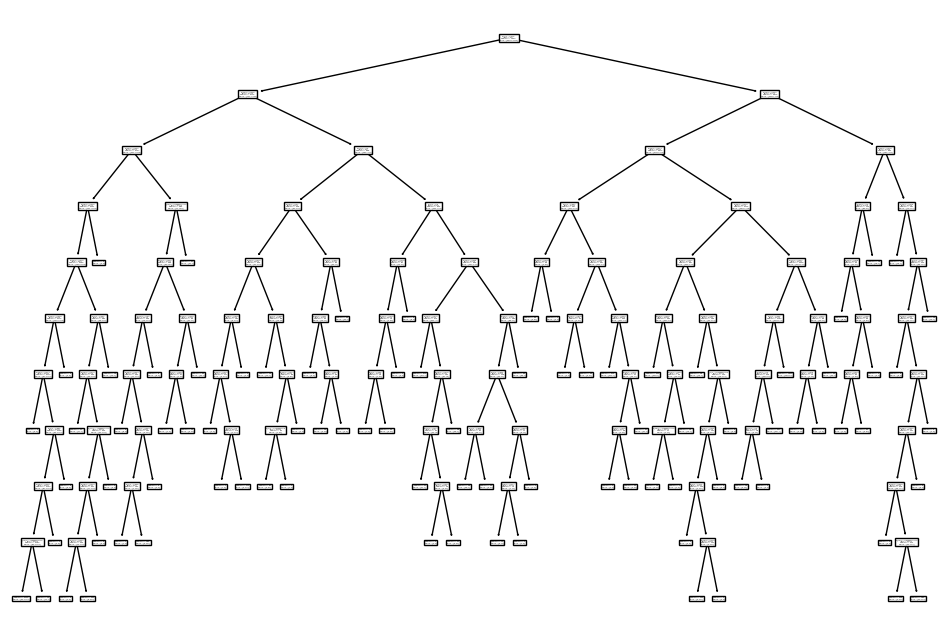

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(best_clf_gini.fit(X_train, y_train))

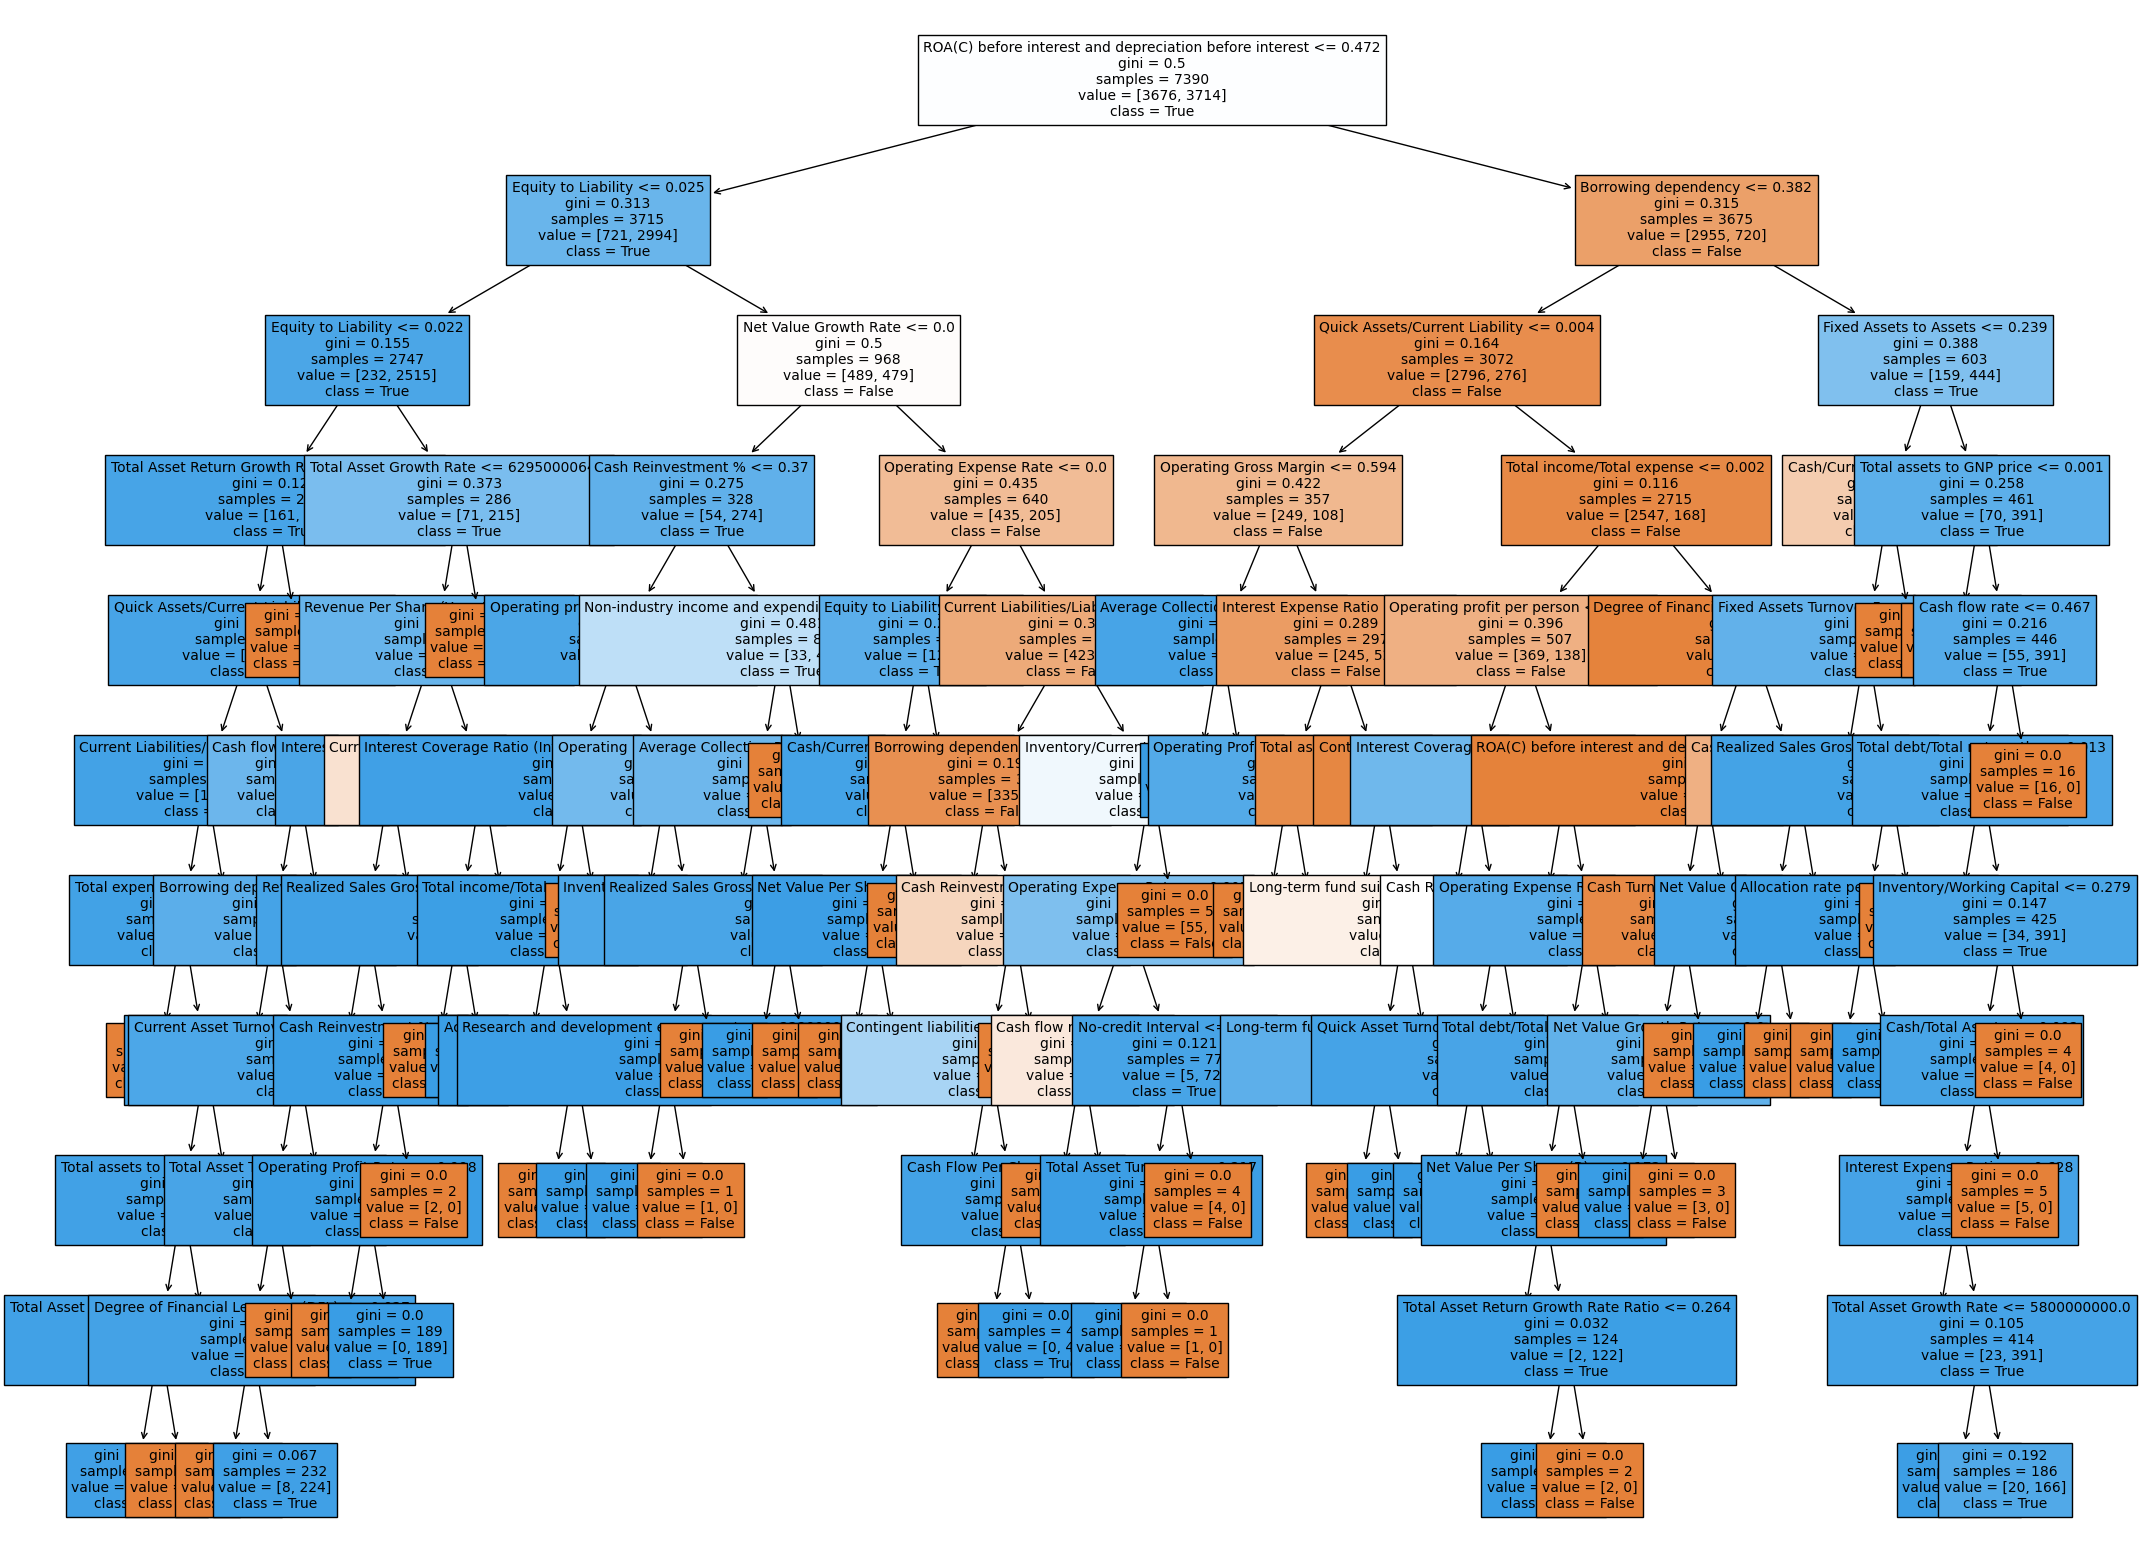

In [ ]:
plt.figure(figsize=(25,20))
tree.plot_tree(best_clf_gini,
               feature_names=X_train.columns,
               class_names=[str(i) for i in best_clf_gini.classes_],
               filled=True,
               fontsize=10)
plt.show()


Testdata

In [ ]:
testDataset.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),...,Fixed Assets to Assets,Cash Flow to Total Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
4082,0,0.447229,0.596167,0.998890,0.303496,1.309005e-04,7.030000e+09,0.462716,0.000684,0.000000,...,0.159905,0.607645,0.308900,0.041909,0,0.004863,0.623636,0.026505,0.563286,0.030051
6557,0,0.590455,0.653051,0.999296,0.303486,6.268654e-04,2.013654e-04,0.489401,0.000000,0.156595,...,0.146075,0.687964,0.319800,0.013302,0,0.001175,0.623933,0.026791,0.565158,0.066948
1044,0,0.502462,0.612260,0.999146,0.303217,1.224590e-04,9.580000e+09,0.465466,0.000252,0.000000,...,0.185809,0.643482,0.314751,0.054968,0,0.008389,0.621861,0.028558,0.568312,0.015819
2128,0,0.484961,0.609558,0.999132,0.303420,9.300000e+09,0.000000e+00,0.464112,0.000649,0.095354,...,0.126827,0.638312,0.313604,0.028832,0,0.003160,0.621735,0.027000,0.565990,0.021892
3736,0,0.500902,0.600405,0.998938,0.303413,1.402671e-04,1.147749e-04,0.472211,0.000275,0.000000,...,0.535812,0.643701,0.314662,0.021100,0,0.001376,0.623115,0.026709,0.564733,0.052005


In [ ]:
X_test = testDataset.drop(['Bankrupt?'], axis = 1)
Y_test = testDataset['Bankrupt?'].astype(bool)

In [ ]:
Y_test_pred_gini = best_clf_gini.predict(X_test)

In [ ]:
print('accuracy score: {:.4f}'.format(accuracy_score(Y_test,Y_test_pred_gini)))

accuracy score: 0.9399


In [ ]:
Cm = confusion_matrix(Y_test, Y_test_pred_gini)
print('Confusion matrix\n',Cm)

Confusion matrix
 [[1886   94]
 [  29   37]]


In [ ]:
print(classification_report(Y_test,Y_test_pred_gini))

              precision    recall  f1-score   support

       False       0.98      0.95      0.97      1980
        True       0.28      0.56      0.38        66

    accuracy                           0.94      2046
   macro avg       0.63      0.76      0.67      2046
weighted avg       0.96      0.94      0.95      2046



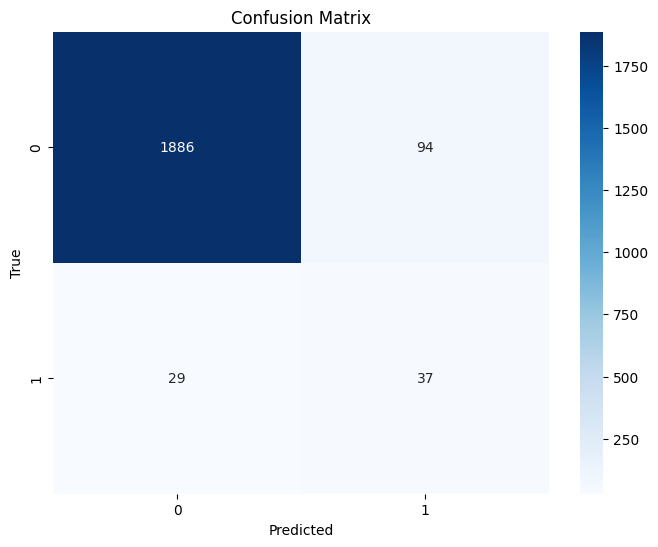

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(Cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
!pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 3.7 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade scipy

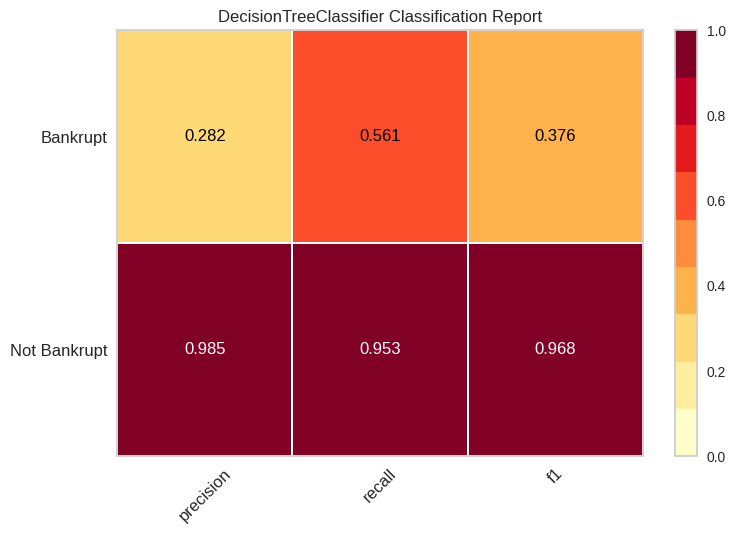

<Axes: title={'center': 'DecisionTreeClassifier Classification Report'}>

In [ ]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(best_clf_gini, classes=['Not Bankrupt', 'Bankrupt'])
visualizer.score(X_test, Y_test)
visualizer.show()